In [1]:
# Install required libraries (if not already installed)
!pip install opencv-python-headless
!pip install matplotlib



In [2]:
# Import necessary libraries for image processing and visualization
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [4]:
# Upload an image in Google Colab
from google.colab import files
uploaded = files.upload()  # Upload an image

Saving green.webp to green (1).webp


In [5]:
# Load the uploaded image
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path)  # Read the image using OpenCV

In [6]:
# Convert the image from BGR (OpenCV format) to RGB (for Matplotlib visualization)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

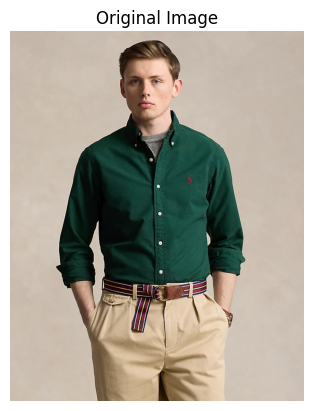

In [7]:
# **Step 1: Display the Original Image**
plt.imshow(img_rgb)  # Display the original image
plt.title('Original Image')  # Add a title to the image
plt.axis('off')  # Hide the axis for better presentation
plt.show()

In [8]:
# **Step 2: Apply Edge Detection (Canny Edge Detection)**
edges = cv2.Canny(img, 100, 200)  # Apply Canny Edge Detection

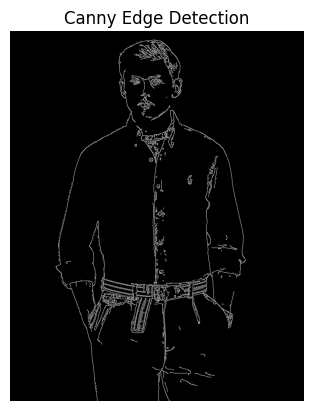

In [9]:
# Display the edge detection result
plt.imshow(edges, cmap='gray')  # Show edges in grayscale
plt.title('Canny Edge Detection')  # Add a title to the edge-detected image
plt.axis('off')  # Hide the axis
plt.show()

In [10]:
# **Step 3: Apply Gaussian Blur**
blurred_img = cv2.GaussianBlur(img, (15, 15), 0)  # Apply Gaussian Blur with a 15x15 kernel

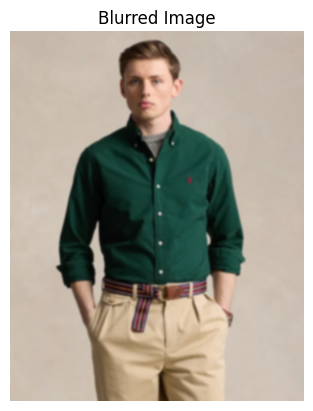

In [11]:
# Convert the blurred image from BGR to RGB for displaying with Matplotlib
blurred_img_rgb = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB)
plt.imshow(blurred_img_rgb)  # Display the blurred image
plt.title('Blurred Image')  # Add a title to the blurred image
plt.axis('off')  # Hide the axis
plt.show()

In [12]:
# **Step 4: Green Color Detection**
# Convert the image to HSV format for color detection
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [13]:
# Define the lower and upper boundaries for detecting green color
lower_green = np.array([35, 52, 72])  # Lower boundary for green
upper_green = np.array([102, 255, 255])  # Upper boundary for green

In [14]:
# Create a mask for detecting green color
mask = cv2.inRange(hsv_img, lower_green, upper_green)

In [15]:
# Apply the mask to extract the green areas from the original image
green_segment = cv2.bitwise_and(img, img, mask=mask)

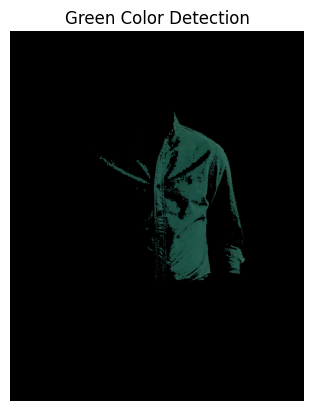

In [16]:
# Convert the green segment to RGB for visualization
green_segment_rgb = cv2.cvtColor(green_segment, cv2.COLOR_BGR2RGB)
plt.imshow(green_segment_rgb)  # Display the green color detection result
plt.title('Green Color Detection')  # Add a title
plt.axis('off')  # Hide the axis
plt.show()

In [17]:
# **Step 5: Display all results together**
# Resize all images for easier side-by-side comparison
resized_original = cv2.resize(img_rgb, (300, 300))
resized_edges = cv2.resize(edges, (300, 300))
resized_blur = cv2.resize(blurred_img_rgb, (300, 300))
resized_green = cv2.resize(green_segment_rgb, (300, 300))

In [18]:
# Stack the images horizontally (top and bottom rows)
top_row = np.hstack((resized_original, cv2.cvtColor(resized_edges, cv2.COLOR_GRAY2RGB)))
bottom_row = np.hstack((resized_blur, resized_green))
final_output = np.vstack((top_row, bottom_row))  # Stack vertically to combine both rows

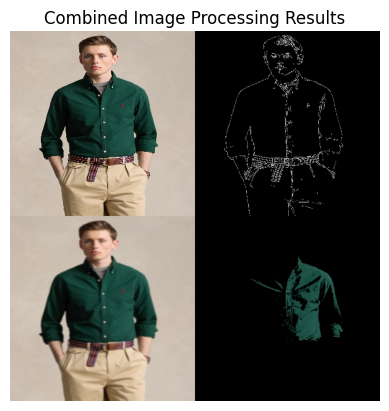

In [19]:
# Display the combined result
plt.imshow(final_output)
plt.title('Combined Image Processing Results')  # Add a title to the combined output
plt.axis('off')  # Hide the axis
plt.show()